# Naive Bayes (bag of words) - Trained on the Sentiment 140 data set
In this section we'll attempt to build a custom Naive Bayes model for text classification. Naive Bayes classifiers use conditional probabilities based on pre-tagged data, so weWill use pre-tagged data set containing about 1.6 million tweets tagged for negative, positive, and neutral sentiment. Try training and running a multinomial Naive Bayes model from sklearn. To "vectorize" the text, we must first apply a TFIDF (term-frequency/inverse document frequency) transformation to model the text values as numeric values.

https://www.kaggle.com/datasets/kazanova/sentiment140?resource=download

In [38]:
import os
import pandas as pd
from comment_scraper import get_sql_table
from matplotlib import pyplot as plt
plt.style.use('seaborn-notebook')

import pandas as pd
import numpy as np

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [14]:
DATA_DIR = 'C:\\Users\\keatu\\Regis_archive\\practicum2_data\\'
dbname = os.path.join(DATA_DIR, "Youtube_Data_msnbc.db")

In [8]:
colnames = ["target","id","date","flag","user","text"]
s140df = pd.read_csv(os.path.join(DATA_DIR,"resources","s140_train.csv"), names = colnames, encoding='latin-1')
sample = pd.concat([s140df.head(100000),s140df.tail(100000)])

In [10]:
sample = pd.concat([s140df.head(100000),s140df.tail(100000)])

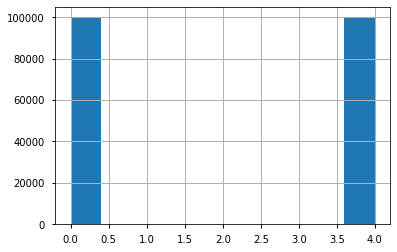

In [11]:
# lookt at distribution
sample['target'].hist()
plt.show()

In [40]:
X=s140df['text']
y=s140df['target']
X_train, X_test, y_train, y_test=train_test_split(X, y)

In [41]:
h_pipeline = Pipeline((
    ('vec', HashingVectorizer()),
    ('clf', PassiveAggressiveClassifier(C=1)),
))

h_pipeline.fit(X_train, y_train).score(X_test, y_test)

0.760135

In [28]:
model = MultinomialNB().fit(X_train, y_train)

ValueError: Input X must be non-negative